<a href="https://colab.research.google.com/github/Vixuz144/Simulacion-1/blob/main/Estudio_Segundo_Notas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
from random import random
import matplotlib.pyplot as plt
from numba import jit
import scipy.stats as ss

#Lienas de espera

##Funciones

In [ ]:
@jit(nopython = True)
def le_1s(T, ll, ls):
  t, i = 0, 0

  lista_tiempos = [t]
  lista_individuos = [i]

  tl = 0
  ts = np.inf
  t = min(tl,ts)

  while min(tl,ts) < T:
    if t == tl: #Llegada
      i += 1
      tl = t - np.log(random())/ll
      if i == 1: #si es el primer cliente
        ts = t - np.log(random())/ls
    else: #Salida
      i -= 1
      if i == 0: #Se vacia
        ts = np.inf
      else:
        ts = t - np.log(random())/ls
    t = min(tl,ts)
    lista_tiempos.append(t)
    lista_individuos.append(i)
  return np.array(lista_tiempos), np.array(lista_individuos)

In [ ]:
@jit(nopython = True)
def le_1s_per_at(T, ll, ls):
  t, i = 0, 0

  tl = 0
  ts = np.inf
  t = min(tl,ts)

  c = 0
  while min(tl,ts) < T:
    if t == tl: #Llegada
      i += 1
      tl = t - np.log(random())/ll
      if i == 1: #si es el primer cliente
        ts = t - np.log(random())/ls
    else: #Salida
      i -= 1
      c += 1
      if t == 0: #Se vacia
        ts = np.inf
      else:
        ts = t - np.log(random())/ls
    t = min(tl,ts)
  return c

In [ ]:
# @jit(nopython = True)
def le_ns(T,ll,ls, N = 10**5):
  lm = []
  for i in range(N):
    n = len(list(ls))
    t = 0
    i = 0

    l_t = [t]
    l_i = [i]
    l_k = [0]
    l_c = [0]

    tl = 0
    ts = list(np.inf * np.ones(n))

    cola = 0

    while min(tl, min(ts)) < T:
      if t == tl: #llegada
        i += 1
        tl = t - np.log(random())/ll

        if np.any(np.isinf(ts)): #Hay servidores vacios
          lk = []
          for k in range(n):
            if np.isinf(ts[k]):
              lk.append(k)

          m = len(lk)
          l = np.linspace(0,1,m+1)
          l[-1] += 0.1
          r = random()

          for j in range(m):
            a, b = l[j], l[j+1]
            if a <= r < b :
              k = lk[j]
              ts[k] = t - np.log(random())/ls[k]

        else: #No hay servidores vacios
          cola += 1
          # k = list(ls).index(min(ls))
          # ts[k] = t - np.log(random())/ls[k]

      else: #salida
        i -= 1
        k = list(ts).index(min(ts))

        if i < n:
          ts[k] = np.inf
        elif cola >= 1 :
          ts[k] = t - np.log(random())/ls[k]
          cola -= 1

      t = min(tl, min(ts))
      l_t.append(t)
      l_i.append(i)
      l_k.append(k)
      l_c.append(cola)

    # return l_t[:-1], l_i[:-1], l_k[:-1], l_c[:-1]
    l_c = np.array(l_c[:-1])
    lm.append(l_c.mean())
  lm = np.array(lm)
  return lm.mean()

##Problemas

1.-Mediante simulación, obtenga una gráfica de la media del número de
personas en el sistema en función del tiempo, considerando los siguientes valores:

a) $μ=2.2$, $λ=2.0$ y $t=100, 200, ..., 1000, 2000 ,3000 , ...,10000$.

b) $μ=2.0$, $λ=2.2$ y $t=100, 200, ..., 1000, 2000 , 3000, ...,10000$.

c) ¿Qué diferencia observa en los resultados obtenidos en a) y en b)?

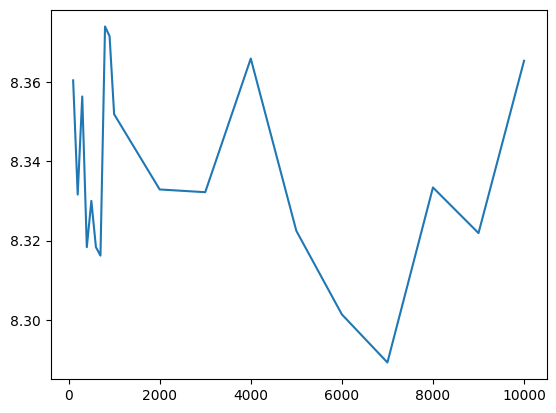

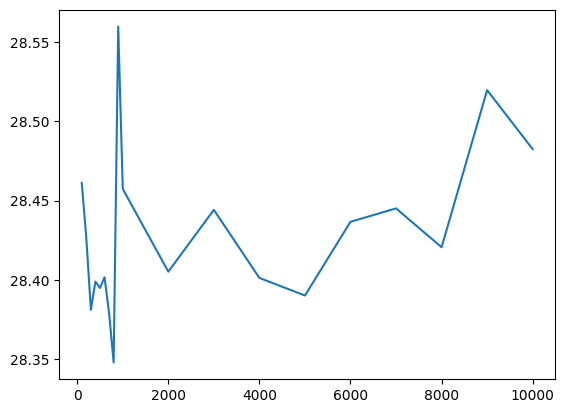

In [ ]:
@jit(nopython = True)
def f(t, l, m, rep):
  lala = []
  for k in range(rep):
    lt, li = le_1s(i, l, m)
    lala.append(li[-1])
  return sum(lala)/rep

t = np.hstack((np.arange(100,1000,100), np.arange(1000,10001,1000)))
ma, la = 2.2, 2
mb, lb = 2, 2.2

rep = 10**5
l1, l2 = list(), []

for i in t:
  l1.append(f(i,la,ma,rep))
  l2.append(f(i,lb,mb,rep))

plt.plot(t,l1)
plt.show()

plt.figure()

plt.plot(t,l2)
plt.show()

2.- Realice la misma actividad que en el problema anterior considerando al
tiempo promedio de permanencia en el sistema, en lugar del número de personas
promedio en el sistema.

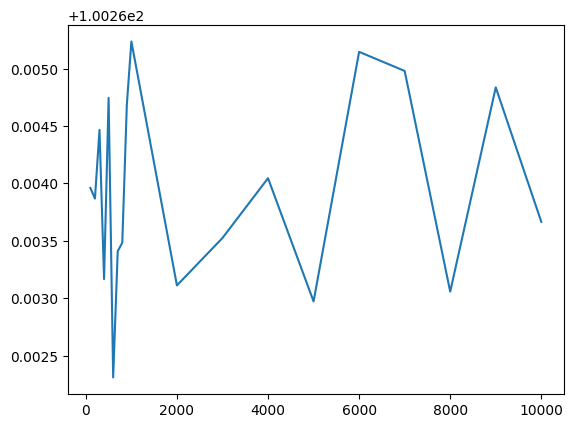

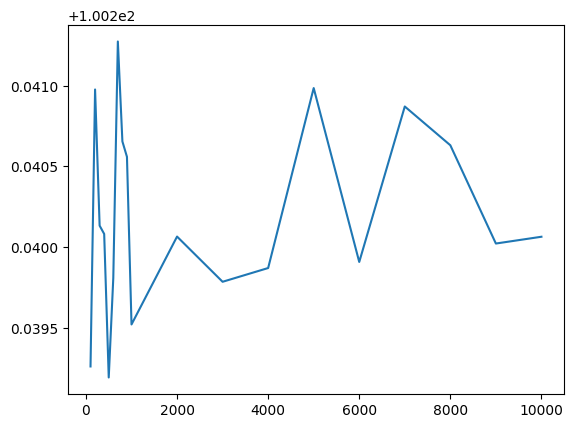

In [ ]:
@jit(nopython = True)
def f(t, l, m, rep):
  lala = []
  for k in range(rep):
    lt, li = le_1s(i, l, m)
    lala.append(lt[-1])
  return sum(lala)/rep

t = np.hstack((np.arange(100,1000,100), np.arange(1000,10001,1000)))
ma, la = 2.2, 2
mb, lb = 2, 2.2

rep = 10**5
l1, l2 = list(), []

for i in t:
  l1.append(f(i,la,ma,rep))
  l2.append(f(i,lb,mb,rep))

plt.plot(t,l1)
plt.show()

plt.figure()

plt.plot(t,l2)
plt.show()

3.- Considere $μ=2.2$, $λ=2.0$. Estime por simulación, el valor esperado y
la varianza del número de personas atendidas en el intervalo de tiempo $[0,240]$.

In [ ]:
ll = 2
ls = 2.2
rep = 10**6
l = []
for i in range(rep):
  l.append(le_1s_per_at(240, ll, ls))

print(np.mean(l))

527.988781


4.- a) Considere $μ=2.2$, $λ=2.0$. Estime el valor esperado del número de personas atendidas en el intervalo de tiempo $[0, 200]$.

b) Estime ésta misma
cantidad, pero considerando que se tienen dos servidores, ambos con
$μ=1.1$, y
$λ=2.0$.

In [ ]:
ll = 2
ls = 2.2
rep = 10**6
l = []
for i in range(rep):
  l.append(le_1s_per_at(200, ll, ls))

print(np.mean(l))

439.993851


5.-Considere dos líneas de espera, una con los parámetros
$μ=2.0 \quad λ=2.2$
y otra, con los parámetros
$μ=2.2 \quad λ=2.4$ . ¿Cuál de ellas atiende a un mayor
número de personas en el intervalo de tiempo? Fundamente su respuesta.

In [ ]:
rep = 10000
l1, l2 = [], []
for i in range(rep):
  l1.append(le_1s_per_at(200, 2.2, 2.0))
  l2.append(le_1s_per_at(200, 2.4, 2.2))

print(np.mean(l1))
print(np.mean(l2))

400.2056
440.2674


#Inventarios

##Funciones

In [ ]:
@jit(nopython = True)
def inventario(T = 365, ll = 5, cap0 = 100, cap_min = 40, cap_max = 100, per = 15, cant_compra = 1, precio_venta = 2, costo_f = 0, costo_oa = 0, costo_at = 0.05, nr = 10**4):
  g = []
  vacio = []
  for i in range(nr):
    cap = cap0

    tr = per
    t = 0
    v = 0
    vp = 0
    tp = 0

    ganancia = 0
    venta = 0
    costo = costo_f
    tv = -np.log(random())/ll

    while t < T:
      ta = t
      t = min(tv,tr)
      costo += (t-ta) * cap * costo_at
      if t==tv:
        if cap > 0:
          v += cant_compra
          cap -= cant_compra
          venta += cant_compra * precio_venta
        else:
          vp += cant_compra
          tp = tp + (t - ta)
        tv = tv - np.log(random())/ll
      else: # t == tr
        if cap < cap_min:
          cap = cap_max
          costo += (cap_max - cap) * costo_oa
        tr = tr + per
    ganancia = venta - costo
    g.append(ganancia)
    vacio.append(tp)
  return g, vacio

In [ ]:
g, tva = inventario(T = 720, ll = 2, cap0 = 500, cap_min = 50, cap_max = 500, per = 24, cant_compra = 2, precio_venta = 0, costo_f = 10, costo_oa = 1.5, costo_at = 0.01,  nr = 10**5)
print('Ganancia esperada:',np.mean(g))
print("Tiempo promedio de almacen vacio:",np.mean(tva))

Ganancia esperada: -1869.6644628063334
Tiempo promedio de almacen vacio: 11.759624391517312


#Ejercicios extra

##Periodicos

Un vendedor de periódicos los vende a \$ 10 cada uno; a él le cuestan \$ 7
cada uno. Si no logra vender un periódico, lo regresa y obtiene un reintegro de
\$ 5 por cada uno. La demanda de periódicos por día sigue una distribución de
Poisson con media de 70 periódicos. a) Estime la ganancia esperada por día, si
se abastece con 50, 60, 70, 80, 90 y 100 periódicos. b) ¿Cuál es el número de
periódicos con los que debe abastecerse para obtener la mayor ganancia? Y ¿De
cuánto es ésta? c) Si compra 70 periódicos, estime la probabilidad de que su
ganancia sea menor que \$ 116.|

In [29]:
# @jit(nopython = True)
def periodicos_ab(n = 10**4):
  v = 10
  c = 7
  r = 5

  k = np.arange(50, 101, 10)
  l = []
  for pc in k:
    beneficio = []
    for i in range(n):
      pd = ss.poisson.rvs(70)
      if pd < pc:
        b = v*pd + r*(pc - pd) - c*pc
      else :
        b = (v - c)*pc
      beneficio.append(b)
    l.append(np.mean(beneficio))
  return l

In [30]:
def periodicos_c(n = 10**4):
  v = 10
  c = 7
  r = 5

  pc = 70
  cont = 0
  for i in range(n):
    pd = ss.poisson.rvs(70)
    if pd < pc:
      b = v*pd + r*(pc - pd) - c*pc
    else :
      b = (v - c)*pc
    if b < 116:
      cont +=1
  return cont/n

In [31]:
print(periodicos_ab())
print(periodicos_c())

[149.9215, 177.865, 193.567, 187.788, 170.661, 150.055]
0.0114


##Restaurante

En un restaurante hay 5 mesas. Los comensales llegan siguiendo un proceso
de Poisson con parámetro 5 usuarios/hora. El tiempo que tardan en comer
sigue una distribución exponencial con media 0.5 horas. Si cuando llegan los
comensales, las 5 mesas están ocupadas, entonces se forman afuera del
restaurante. Estime por simulación el valor esperado del valor medio del
número de personas esperando afuera en el intervalo [0,8].


In [32]:
def le_ns(T,ll,ls, N = 10**5):
  lm = []
  for i in range(N):
    n = len(list(ls))
    t = 0
    i = 0

    l_t = [t]
    l_i = [i]
    l_k = [0]
    l_c = [0]

    tl = 0
    ts = list(np.inf * np.ones(n))

    cola = 0

    while min(tl, min(ts)) < T:
      if t == tl: #llegada
        i += 1
        tl = t - np.log(random())/ll

        if np.any(np.isinf(ts)): #Hay servidores vacios
          lk = []
          for k in range(n):
            if np.isinf(ts[k]):
              lk.append(k)

          m = len(lk)
          l = np.linspace(0,1,m+1)
          l[-1] += 0.1
          r = random()

          for j in range(m):
            a, b = l[j], l[j+1]
            if a <= r < b :
              k = lk[j]
              ts[k] = t - np.log(random())/ls[k]

        else: #No hay servidores vacios
          cola += 1
          # k = list(ls).index(min(ls))
          # ts[k] = t - np.log(random())/ls[k]

      else: #salida
        i -= 1
        k = list(ts).index(min(ts))

        if i < n:
          ts[k] = np.inf
        elif cola >= 1 :
          ts[k] = t - np.log(random())/ls[k]
          cola -= 1

      t = min(tl, min(ts))
      l_t.append(t)
      l_i.append(i)
      l_k.append(k)
      l_c.append(cola)

    # return l_t[:-1], l_i[:-1], l_k[:-1], l_c[:-1]
    l_c = np.array(l_c[:-1])
    lm.append(l_c.mean())
  lm = np.array(lm)
  return lm.mean()

In [38]:
T = 8
ll = 5
nr = 10**4
s = 0.5
ls = [1/s, 1/s, 1/s, 1/s, 1/s]
print(le_ns(T, ll, ls, nr))

print()

ls = [s, s, s, s, s]
print(le_ns(T, ll, ls, nr))

0.14740140889225334

7.693457956844644
